# **Proyek Analisis Data: E-Commerce Public Dataset**

* **Nama:** Meakhel Gunawan
* **Email:** meakhel220504@gmail.com
* **Id Dicoding:** meakhelg

# **Pertanyaan Bisnis**

* Produk apa saja yang memiliki jumlah pembelian terbesar dan terkecil?
* Bagaimana tingkat kepuasan pembeli terhadap layanan E-Commerce kami?
* Bagaimana performa order transaksi di platform E-Commerce setiap bulan?
* Bagaimana perilaku pembelian pelanggan dengan menggunakan RFM Analysis?
* Dimana saja customer terbanyak berdasarkan letak geografisnya?

# **Menyiapkan library-library yang dibutuhkan**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import datetime as dt
import unidecode
import urllib

# **1. Data Wrangling**

### 1.1 Gathering data

Membaca dataset customers

In [90]:
df_customers=pd.read_csv('data\customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Membaca dataset geolocation

In [91]:
df_geolocation=pd.read_csv('data\geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Membaca dataset order items

In [92]:
df_order_items=pd.read_csv('data\order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Membaca dataset order payments

In [93]:
df_order_payments=pd.read_csv('data\order_payments_dataset.csv')
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Membaca dataset order reviews

In [94]:
df_order_reviews=pd.read_csv('data\order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Membaca dataset orders 

In [95]:
df_orders=pd.read_csv('data\orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Membaca dataset product category

In [96]:
df_product_category=pd.read_csv('data\product_category_name_translation.csv')
df_product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Membaca dataset products

In [97]:
df_products=pd.read_csv('data\products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Membaca dataset sellers

In [98]:
df_sellers=pd.read_csv('data\sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### 1.2 Assessing Data

Melihat info setiap dataframe

In [99]:
df_products.info()
df_geolocation.info()
df_order_items.info()
df_order_payments.info()
df_order_reviews.info()
df_orders.info()
df_product_category.info()
df_products.info()
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       -------

Mengecek data null pada setiap dataframe

In [100]:
print(f'Info data null customers:          \n{df_customers.isna().sum()}\n'
      f'\nInfo data null geolocation:      \n{df_geolocation.isna().sum()}\n'
      f'\nInfo data null order items:      \n{df_order_items.isna().sum()}\n'
      f'\nInfo data null order payments:   \n{df_order_payments.isna().sum()}\n'
      f'\nInfo data null order reviews:    \n{df_order_reviews.isna().sum()}\n'
      f'\nInfo data null orders:           \n{df_orders.isna().sum()}\n'
      f'\nInfo data null product category: \n{df_product_category.isna().sum()}\n'
      f'\nInfo data null products:         \n{df_products.isna().sum()}\n'
      f'\nInfo data null sellers:          \n{df_sellers.isna().sum()}\n'
)  

Info data null customers:          
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info data null geolocation:      
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Info data null order items:      
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Info data null order payments:   
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Info data null order reviews:    
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_messa

Mengecek data duplikat

In [101]:
print(f'Total duplicate customers        = {df_customers.duplicated().sum()}\n'
      f'Total duplicate geolocation      = {df_geolocation.duplicated().sum()}\n'
      f'Total duplicate order items      = {df_order_items.duplicated().sum()}\n'
      f'Total duplicate order payments    = {df_order_payments.duplicated().sum()}\n'
      f'Total duplicate order review     = {df_order_reviews.duplicated().sum()}\n'
      f'Total duplicate order            = {df_orders.duplicated().sum()}\n'
      f'Total duplicate products         = {df_products.duplicated().sum()}\n'
      f'Total duplicate seller           = {df_sellers.duplicated().sum()}\n'
      f'Total duplicate product category = {df_product_category.duplicated().sum()}\n'
      )

Total duplicate customers        = 0
Total duplicate geolocation      = 261831
Total duplicate order items      = 0
Total duplicate order payments    = 0
Total duplicate order review     = 0
Total duplicate order            = 0
Total duplicate products         = 0
Total duplicate seller           = 0
Total duplicate product category = 0



Mendescribe masing-masing dataframe

In [102]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [103]:
df_geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [104]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [105]:
df_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [106]:
df_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [107]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [108]:
df_product_category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [109]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [110]:
df_sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### 1.3 Cleaning Data

Mengubah kolom-kolom yang berisi tanggal dan jam dari tipe data object atau string menjadi tipe data datetime

In [111]:
order_items_col=['shipping_limit_date']
for col in order_items_col:
    df_order_items[col]=pd.to_datetime(df_order_items[col])

In [112]:
order_reviews_col=['review_creation_date', 'review_answer_timestamp']
for col in order_reviews_col:
    df_order_reviews[col]=pd.to_datetime(df_order_reviews[col])

In [113]:
orders_col=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']
for col in orders_col:
    df_orders[col]=pd.to_datetime(df_orders[col])

Menghapus data duplikat

In [114]:
df_geolocation.duplicated().sum()

261831

In [115]:
df_geolocation.drop_duplicates(inplace=True)

In [116]:
df_geolocation.duplicated().sum()

0

Membersihkan data yang null pada df_order_reviews

In [117]:
df_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Mengganti nilai column review_comment_title & review_comment_message yang memiliki nilai null dengan string "Not Available"

In [118]:
df_order_reviews["review_comment_title"].fillna("Not Available", inplace=True)
df_order_reviews["review_comment_message"].fillna("Not Available", inplace=True)

C:\Users\MeakhelG\AppData\Local\Temp\ipykernel_3768\1120190401.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_order_reviews["review_comment_title"].fillna("Not Available", inplace=True)
C:\Users\MeakhelG\AppData\Local\Temp\ipykernel_3768\1120190401.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Mengecek kembali jumlah nilai null pada df order review setelah di cleaning

In [119]:
df_order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Pada df_orders, kolom yang berisi nilai null terletak pada kolom yang memiliki tipedata datetime. Jika saya menggantinya ke nilai yang lain, maka tipedata kolom tersebut akan berubah ke object, sehingga saya tidak mengubahnya dan membiarkan nilai null tersebut karena bisa saja baris tuple tersebut memiliki sesuatu yang penting

In [120]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Membersihkan data yang null pada df_products

In [121]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [122]:
df_products[df_products.isnull().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [123]:
df_products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [124]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Pada df_products, hampir semua kolom memiliki nilai null, kecuali product_id. Pada kolom product_category_name bertipe data object, artinya kita tidak bisa mengisi NaN tersebut dengan metode imputation atau interpolation, maka saya biarkan berisi NaN. Tetapi pada kolom yang lain, saya gunakan metode median imputation untuk mengisi nilai null pada kolom tersebut.

In [125]:
df_products['product_name_lenght'].fillna(df_products['product_name_lenght'].median(), inplace=True)
df_products['product_description_lenght'].fillna(df_products['product_description_lenght'].median(), inplace=True)
df_products['product_photos_qty'].fillna(df_products['product_photos_qty'].median(), inplace=True)
df_products['product_weight_g'].fillna(df_products['product_weight_g'].median(), inplace=True)
df_products['product_length_cm'].fillna(df_products['product_length_cm'].median(), inplace=True)
df_products['product_height_cm'].fillna(df_products['product_height_cm'].median(), inplace=True)
df_products['product_width_cm'].fillna(df_products['product_width_cm'].median(), inplace=True)

C:\Users\MeakhelG\AppData\Local\Temp\ipykernel_3768\3131942395.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products['product_name_lenght'].fillna(df_products['product_name_lenght'].median(), inplace=True)
C:\Users\MeakhelG\AppData\Local\Temp\ipykernel_3768\3131942395.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [126]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght             0
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

# **2. Exploratory Data Analysis (EDA)**

### Explore **df_customers**

In [127]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [128]:
df_customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Dapat kita lihat bahwa customer_id di df_customers memiliki nilai yang unik atau berbeda semua

In [129]:
df_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Mengetahui asal kota customer terbanyak dengan menggabungkan customer_city dan customer_state terlebih dahulu

In [130]:
df_customers.groupby(['customer_city', 'customer_state'])['customer_id'].nunique().sort_values(ascending=False).reset_index()

,customer_city,customer_state,customer_id
0,sao paulo,SP,15540
1,rio de janeiro,RJ,6882
2,belo horizonte,MG,2773
3,brasilia,DF,2131
4,curitiba,PR,1521
...,...,...,...
4305,ewbank da camara,MG,1
4306,marechal deodoro,AL,1
4307,fagundes,PB,1
4308,farol,PR,1


Dari tabel diatas, dapat dilihat Kota Sao Paulo (SP) adalah kota yang memiliki customer paling banyak. Hal ini akan lebih lanjut dijelaskan pada bagian Visualisasi Data.

### Explore **df_geolocation**

In [131]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


Disini saya akan mengubah kata-kata dalam kolom geolocation_city menjadi lebih baik tanpa ada aksen, simbol, dan sejenisnya menggunakan sebuah fungsi.
Contoh hasil dari fungsi ini yaitu 'são paulo' menjadi 'sao paulo'	

In [132]:
def perbaikan_kata(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [133]:
df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].apply(perbaikan_kata)

In [134]:
(df_geolocation['geolocation_city']=='são paulo').sum()

0

In [135]:
df_geolocation.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,99643
1,rio de janeiro,RJ,35175
2,belo horizonte,MG,19474
3,curitiba,PR,11263
4,brasilia,DF,8791
...,...,...,...
6343,carajas,PA,1
6344,maceia3,AL,1
6345,senador sa,CE,1
6346,pureza,RN,1


Dari tabel diatas, dapat dilihat Kota Sao Paulo adalah kota yang paling banyak indexnya. Hal ini akan lebih lanjut dijelaskan pada bagian Visualisasi Data.

### Explore **df_order_items**

In [136]:
df_order_items.sort_values(by=['price'], ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


Dari tabel diatas, dapat dilihat harga barang tertinggi adalah 6735, sedangkan harga terendah yaitu 0.85.

### Explore **df_order_payments**

In [137]:
df_order_payments.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: order_id, dtype: int64

Dari hasil diatas, dapat dilihat jika penggunaan tipe pembayaran terbanyak yaitu memakai kartu kredit yang disusul oleh boleto dan voucher.

### Explore **df_order_reviews**

In [138]:
df_order_reviews['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

Dari hasil diatas, dapat dilihat jika rating skor 5 adalah yang terbanyak disusul oleh skor 4 dan skor 1. Hal ini akan lebih lanjut dijelaskan pada bagian Visualisasi Data.

### Explore **df_orders**

In [139]:
df_orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Dari hasil diatas, dapat dilihat jika status order delivered adalah yang terbanyak disusul oleh shipped dan canceled.

### Menggabungkan (Merging) dataframe-dataframe

Khusus untuk df_geolocation tidak ikut digabungkan karena tidak relevan untuk dijadikan data gabungan.

#### Merge df_customers dan df_orders

In [140]:
df_customers_orders = pd.merge(
    left=df_customers,
    right=df_orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
df_customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


#### Merge df_order_payments dan df_order_reviews

In [141]:
df_orders_payref = pd.merge(
    left=df_order_payments,
    right=df_order_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
df_orders_payref.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Not Available,Not Available,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Not Available,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Not Available,Not Available,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Not Available,Not Available,2017-12-21,2017-12-22 01:10:39


#### Merge df_products dan df_product_category

In [142]:
df_products_new=pd.merge(
    left=df_products,
    right=df_product_category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
df_products_new.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Memindahkan kolom product_category_name_english ke sebelah kolom product_category_name

In [143]:
col = df_products_new.pop('product_category_name_english')
df_products_new.insert(2, col.name, col)
df_products_new.head()

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Merge df_order_items dan df_sellers

In [144]:
df_items_sellers = pd.merge(
    left=df_order_items,
    right=df_sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
df_items_sellers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


#### Merge keseluruhan dataframe

In [145]:
merge1 = pd.merge(
    left=df_customers_orders,
    right=df_orders_payref,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,Not Available,Not Available,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Not Available,Not Available,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,Not Available,Not Available,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,Not Available,Not Available,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


In [146]:
merge2=pd.merge(
    left=merge1,
    right=df_items_sellers,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-30 22:34:40,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-10 22:43:29,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-15 12:10:59,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-02 18:36:47,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-17 01:59:52,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [147]:
df_all=pd.merge(
    left=merge2,
    right=df_products_new,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
df_all.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,SC,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,SP,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,SP,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,SP,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [148]:
df_all.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_installments,payment_value,review_score,...,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,119143.000000,119143,118966,117057,115722,119143,119140.000000,119140.000000,119140.000000,118143.000000,...,118310.000000,118310.000000,118310.000000,118310.000000,118310.000000,118310.000000,118310.000000,118310.000000,118310.000000,118310.000000
mean,35033.451298,2017-12-29 18:36:13.115760384,2017-12-30 04:49:18.425726720,2018-01-03 08:24:34.395525376,2018-01-12 20:55:38.199616256,2018-01-22 15:21:10.241642496,1.094737,2.941246,172.735135,4.015659,...,120.646603,20.032387,24442.410413,48.799746,783.209272,2.187753,2112.012002,30.264255,16.619094,23.074279
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,0.000000,0.000000,1.000000,...,0.850000,0.000000,1001.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11250.000000,2017-09-10 20:15:46,2017-09-11 15:50:48.500000,2017-09-14 19:52:12,2017-09-22 21:54:31.249999872,2017-10-02 00:00:00,1.000000,1.000000,60.850000,4.000000,...,39.900000,13.080000,6429.000000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24240.000000,2018-01-17 11:59:12,2018-01-17 16:49:49,2018-01-23 17:03:08,2018-02-01 03:17:55,2018-02-14 00:00:00,1.000000,2.000000,108.160000,5.000000,...,74.900000,16.280000,13660.000000,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,58475.000000,2018-05-03 13:18:30,2018-05-03 16:56:53,2018-05-07 14:57:00,2018-05-15 00:08:31.500000,2018-05-25 00:00:00,1.000000,4.000000,189.240000,5.000000,...,134.900000,21.180000,27972.000000,57.000000,977.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99990.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,29.000000,24.000000,13664.080000,5.000000,...,6735.000000,409.680000,99730.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
std,29823.198969,NaN,NaN,NaN,NaN,NaN,0.730141,2.777848,267.776077,1.400371,...,184.109691,15.836850,27573.004511,9.964369,648.254189,1.711055,3786.419544,16.188144,13.452529,11.748214


### RFM (Recency, Frequency, dan Monetary) Analysis

In [149]:
df_all['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [150]:
df_all['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [151]:
df_rfm = df_all.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  # Mengambil tanggal order terakhir
    "order_id": "count",                # Menghitung jumlah order (frekuensi)
    "price": "sum"                      # Menghitung total revenue (monetary)
})
df_rfm.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
df_rfm["max_order_timestamp"] = df_rfm["max_order_timestamp"].dt.date
recent_date = df_orders["order_purchase_timestamp"].dt.date.max()
# Asumsi sekarang adalah 1 hari setelah order terakhir alias '2018-10-18'
df_rfm["recency"] = df_rfm["max_order_timestamp"].apply(lambda x: (recent_date - x).days) + 1
df_rfm.drop("max_order_timestamp", axis=1, inplace=True)
df_rfm = df_rfm[['customer_id', 'recency', 'frequency', 'monetary']]
df_rfm.head()

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,338,1,89.80
1,000161a058600d5901f007fab4c27140,459,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,597,1,179.99
3,0002414f95344307404f0ace7a26f1d5,428,1,149.90
4,000379cdec625522490c315e70c7a9fb,199,1,93.00


Melihat customer yang terakhir kali berbelanja

In [152]:
df_rfm.sort_values(by='recency',ascending=True)

,customer_id,recency,frequency,monetary
63970,a4b417188addbc05b26b72d5e44837a1,1,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,2,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,15,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,17,1,0.00
15595,2823ffda607a2316375088e0d00005ec,19,1,0.00
...,...,...,...,...
68946,b106b360fe2ef8849fbbd056f777b4d5,746,1,100.00
52277,86dc2ffce2dfff336de2f386a786e574,763,3,134.97
38013,622e13439d6b5a0b486c435618b2679e,765,1,0.00
40289,683c54fc24d40ee9f8a6fc179fd9856c,773,1,59.50


Dapat dilihat jika customer yang terakhir kali berbelanja adalah 1 hari yang lalu, dan paling lama adalah 774 hari yang lalu. Hal ini akan lebih lanjut dijelaskan pada bagian Visualisasi Data.

Melihat customer dengan jumlah pembelian produk terbanyak

In [153]:
df_rfm.sort_values(by='frequency',ascending=False)

,customer_id,recency,frequency,monetary
15183,270c23a11d024a44c896d1894b261a83,436,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,390,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,546,29,11383.95
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,498,26,1299.74
81894,d22f25a9fadfb1abbc2e29395b1239f4,159,24,359.76
...,...,...,...,...
35433,5b9d5dfe6b754261741fb68772efed93,257,1,22.99
35432,5b99d2ac45d9e913fa37e13a7e73f1fc,457,1,59.90
35431,5b985c8b77fba94494956d5f1e717933,163,1,120.00
35429,5b97e86cf344fc8159321fe9a84dbef9,536,1,139.90


Dapat dilihat jika customer dengan pembelian produk terbanyak adalah 63 produk, dan yang tersedikit adalah 1 produk. Hal ini akan lebih lanjut dijelaskan pada bagian Visualisasi Data.

Melihat customer dengan pengeluaran terbesar

In [154]:
df_rfm.sort_values(by='monetary',ascending=False)

,customer_id,recency,frequency,monetary
8546,1617b1357756262bfa56ab541c47bc16,384,8,13440.00
60184,9af2372a1e49340278e7c1ef8d749f34,546,29,11383.95
86603,de832e8dbb1f588a47013e53feaa67cc,507,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,246,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,161,7,9520.14
...,...,...,...,...
70386,b4bade0909a2956cbeef036f6fd7b95e,273,1,0.00
33389,5645f6b97d3740bc2846f27af1fe973f,217,1,0.00
70474,b4f3d737d8ec2ad8a4e85fc6e578a4fc,433,1,0.00
33344,56252fddbb6af46b87f5a070d68afd95,165,1,0.00


Dapat dilihat jika customer dengan pengeluaran terbesar adalah 13440, dan yang tersedikit adalah 0. Hal ini akan lebih lanjut dijelaskan pada bagian Visualisasi Data.

Melakukan merge kembali antara df_all dengan df_rfm

In [155]:
df_all=pd.merge(
    left=df_all,
    right=df_rfm,
    how='left',
    right_on='customer_id',
    left_on='customer_id'

)

In [156]:
df_all.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,recency,frequency,monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,520,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,279,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,152,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,219,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,81,1,230.00


In [157]:
df_all.to_csv('./dashboard/all_data.csv', index=False)

# **3. Visualisasi Data dan Explanatory Analysis**

In [158]:
df_all

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,recency,frequency,monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,520,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,279,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,152,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,219,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,81,1,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,51.0,489.0,2.0,611.0,22.0,22.0,23.0,194,1,74.90
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,197,1,114.90
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,60.0,575.0,1.0,870.0,25.0,20.0,18.0,193,1,37.00
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,59.0,452.0,1.0,710.0,19.0,13.0,14.0,349,1,689.00


### Pertanyaan ke-1. Produk apa saja yang memiliki jumlah pembelian terbesar dan terkecil?

In [159]:
product_id_counts = df_all.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_product = product_id_counts.sort_values(by='product_id', ascending=False)
sorted_product

,product_category_name_english,product_id
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


C:\Users\MeakhelG\AppData\Local\Temp\ipykernel_3768\1283183804.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_product.head(5), palette=colors_positive, ax=ax[0])
C:\Users\MeakhelG\AppData\Local\Temp\ipykernel_3768\1283183804.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_product.sort_values(by="product_id", ascending=True).head(5), palette=colors_negative, ax=ax[1])


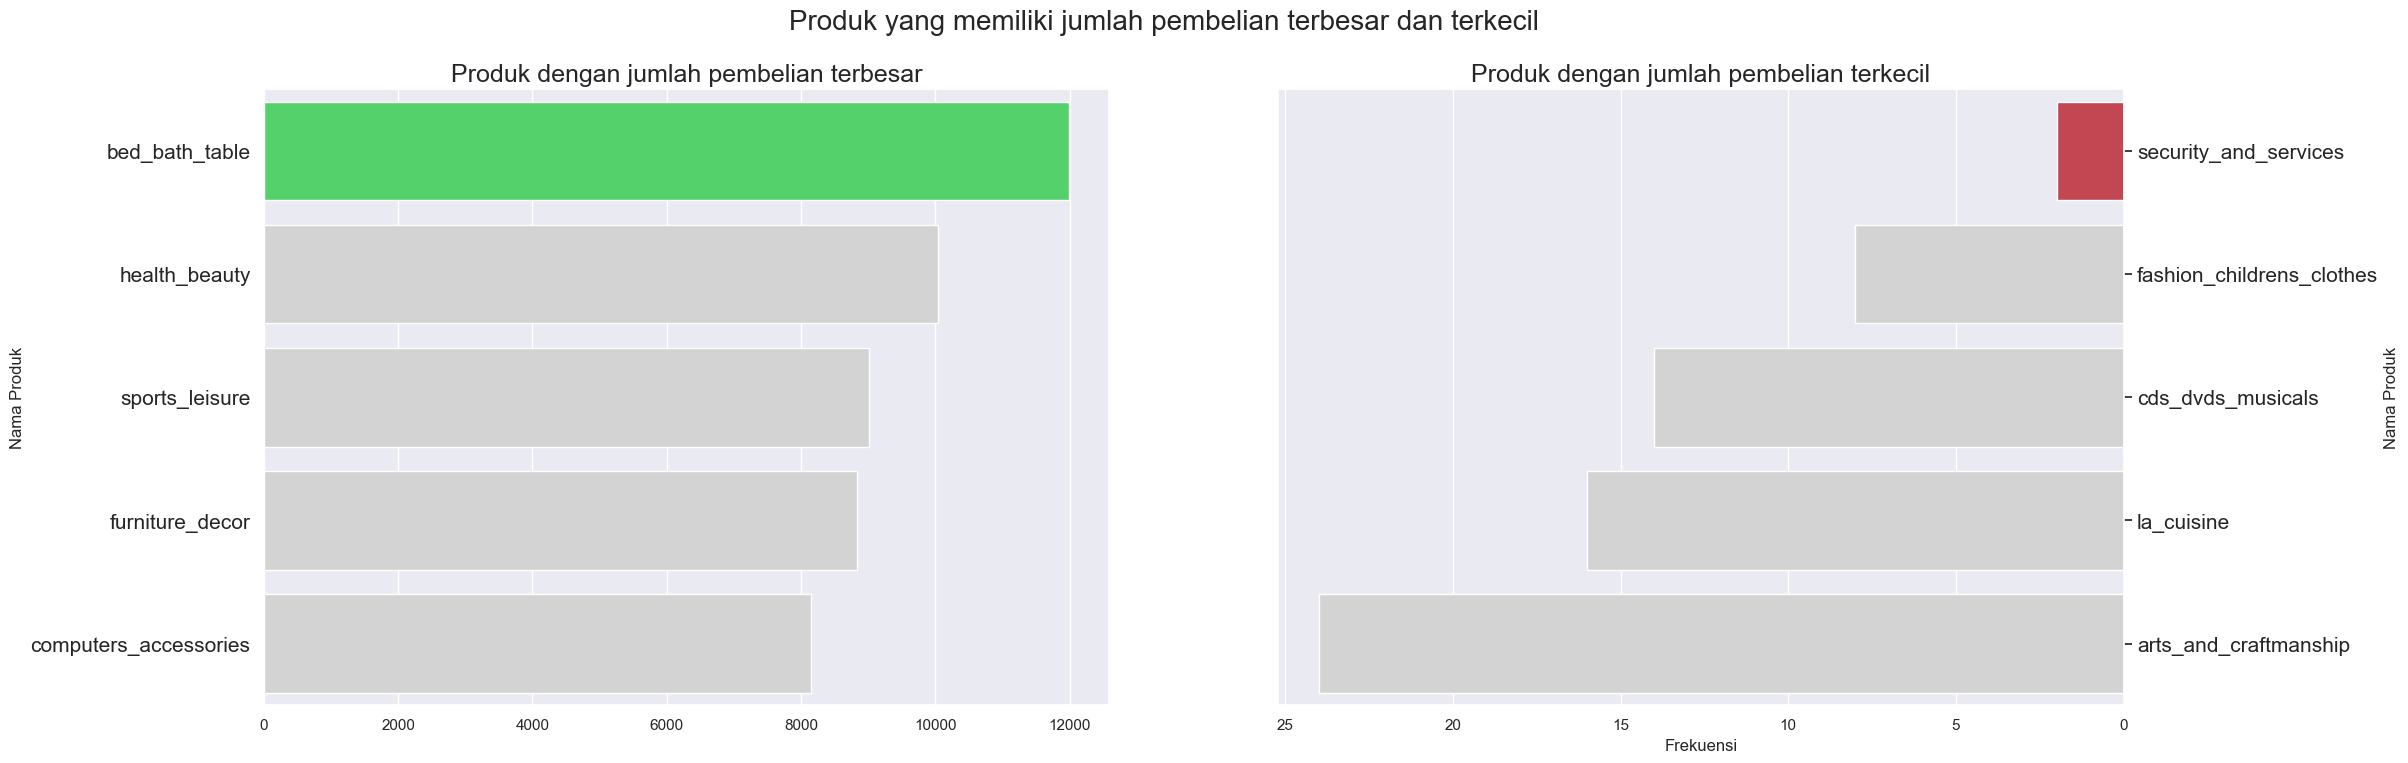

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

colors_positive = ["#40E65F", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors_negative = ["#D63341", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_product.head(5), palette=colors_positive, ax=ax[0])
ax[0].set_xlabel('Frekuensi')
ax[0].set_ylabel('Nama Produk')
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan jumlah pembelian terbesar", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_product.sort_values(by="product_id", ascending=True).head(5), palette=colors_negative, ax=ax[1])
ax[1].set_xlabel('Frekuensi')
ax[1].set_ylabel('Nama Produk')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan jumlah pembelian terkecil", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk yang memiliki jumlah pembelian terbesar dan terkecil", fontsize=20)
plt.show()


#### **Produk apa saja yang memiliki jumlah pembelian terbesar dan terkecil?**
Melalui visualisasi data diatas, dapat dilihat produk dengan jumlah pembelian terbesar yaitu **bed_bath_table** dengan warna hijau. Sebaliknya produk dengan jumlah pembelian terkecil yaitu **security_and_services** dengan warna merah.

### Pertanyaan ke-2. Bagaimana tingkat kepuasan pembeli terhadap layanan E-Commerce kami?

C:\Users\MeakhelG\AppData\Local\Temp\ipykernel_3768\2621797952.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_service.index,


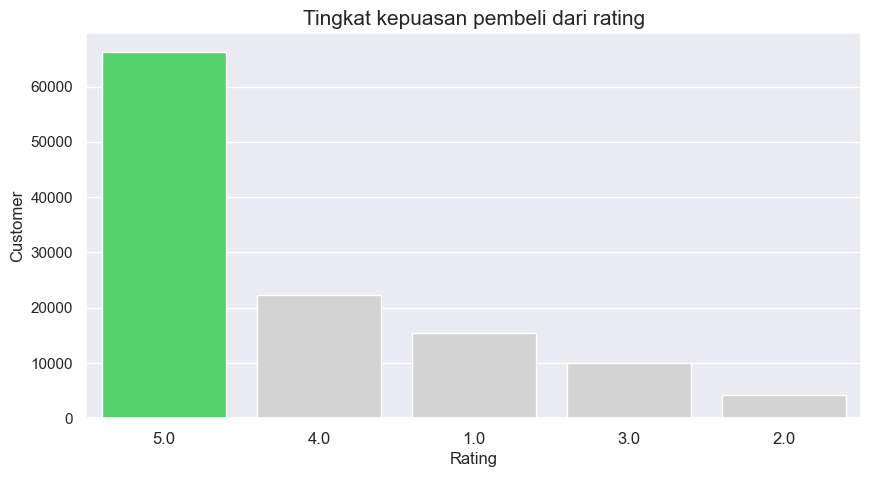

In [161]:
rating_service = df_all['review_score'].value_counts().sort_values(ascending=False)
max_score = rating_service.idxmax()

sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=rating_service.index, 
            y=rating_service.values, 
            order=rating_service.index,
            palette=["#40E65F" if score == max_score else "#D3D3D3" for score in rating_service.index]
            )

plt.title("Tingkat kepuasan pembeli dari rating", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
plt.show()

#### **Bagaimana tingkat kepuasan pembeli terhadap layanan E-Commerce kami?**
Melalui visualisasi data diatas, dapat dilihat jika **rating 5 adalah rating tertinggi** dengan perolehan lebih dari 60000 customer yang ditandai dengan warna hijau, kemudian disusul oleh **rating 4** dan **rating 1**.

### Pertanyaan ke-3. Bagaimana performa order transaksi di platform E-Commerce setiap bulan?

Performa ini dinilai dari kolom order_approved_at dan jumlah order

In [162]:
df_bulanan = df_all.resample(rule='ME', on='order_approved_at').agg({
    "order_id": "nunique",
})
df_bulanan

,order_id
order_approved_at,
2016-09-30,1
2016-10-31,320
2016-11-30,0
2016-12-31,1
2017-01-31,760
2017-02-28,1765
2017-03-31,2689
2017-04-30,2374
2017-05-31,3693


In [163]:
df_bulanan.index

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', name='order_approved_at', freq=None)

In [164]:
df_bulanan.index = df_bulanan.index.strftime('%Y-%B') #mengubah format order_approved_at menjadi Tahun-Bulan
df_bulanan = df_bulanan.reset_index()
df_bulanan.rename(columns={
    "order_id": "order_count",
}, inplace=True)
df_bulanan

,order_approved_at,order_count
0,2016-September,1
1,2016-October,320
2,2016-November,0
3,2016-December,1
4,2017-January,760
5,2017-February,1765
6,2017-March,2689
7,2017-April,2374
8,2017-May,3693
9,2017-June,3252


In [165]:
df_orders_sorted = df_orders.sort_values(by=['order_approved_at'], ascending=True)
df_orders_sorted

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
64058,1ff217aa612f6cd7c4255c9bfe931c8b,b3a9bf200375f53cc5c6991919c356fd,delivered,2016-10-04 09:16:33,2016-10-04 09:43:32,2016-10-21 16:33:45,2016-10-24 16:33:45,2016-11-24
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
6747,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14 16:08:00,2016-11-23
67037,ed8c7b1b3eb256c70ce0c74231e1da88,da0ba2a9935bca5b4610b0e3bca9d3b4,delivered,2016-10-04 09:59:03,2016-10-04 10:25:46,2016-11-11 15:29:14,2016-11-18 08:51:07,2016-11-24
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


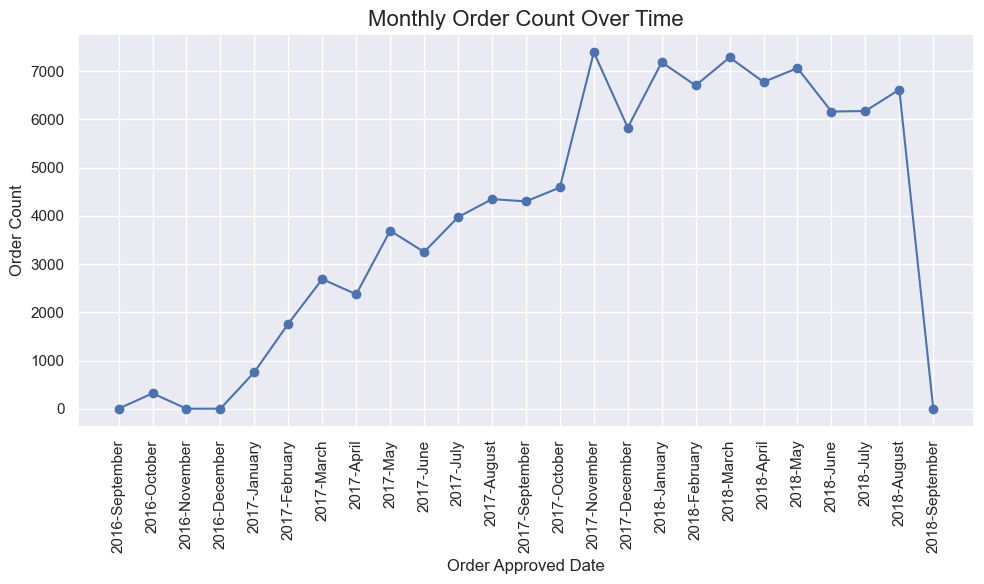

In [166]:
plt.figure(figsize=(10, 6))
plt.plot(df_bulanan['order_approved_at'], df_bulanan['order_count'], marker='o', color='b')

plt.title('Monthly Order Count Over Time', fontsize=16)
plt.xlabel('Order Approved Date', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Bagaimana performa order transaksi di platform E-Commerce setiap bulan?**
Melalui visualisasi data yang dapat dilihat, performa order tertinggi berdasarkan order_approved_at adalah pada saat **November 2017**. Selain itu, ada peningkatan performa order mulai dari **Desember 2016** hingga **November 2017**. Kemudian mengalami stagnansi pada **Januari 2018** hingga **May 2018**.

### Pertanyaan ke-4. Bagaimana perilaku pembelian pelanggan dengan menggunakan RFM Analysis?
* R-Recency
* F-Frequency
* M-Monetary

In [167]:
df_rfm

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,338,1,89.80
1,000161a058600d5901f007fab4c27140,459,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,597,1,179.99
3,0002414f95344307404f0ace7a26f1d5,428,1,149.90
4,000379cdec625522490c315e70c7a9fb,199,1,93.00
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,203,3,164.70
99437,fffeda5b6d849fbd39689bb92087f431,149,1,47.90
99438,ffff42319e9b2d713724ae527742af25,127,1,199.90
99439,ffffa3172527f765de70084a7e53aae8,411,2,21.80


C:\Users\MeakhelG\AppData\Local\Temp\ipykernel_3768\1031420307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=df_rfm.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\MeakhelG\AppData\Local\Temp\ipykernel_3768\1031420307.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
C:\Users\MeakhelG\AppData\Local\Temp\ipykernel_3768\1031420307.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=df_rfm.sort_values(by="frequency", ascending=False)

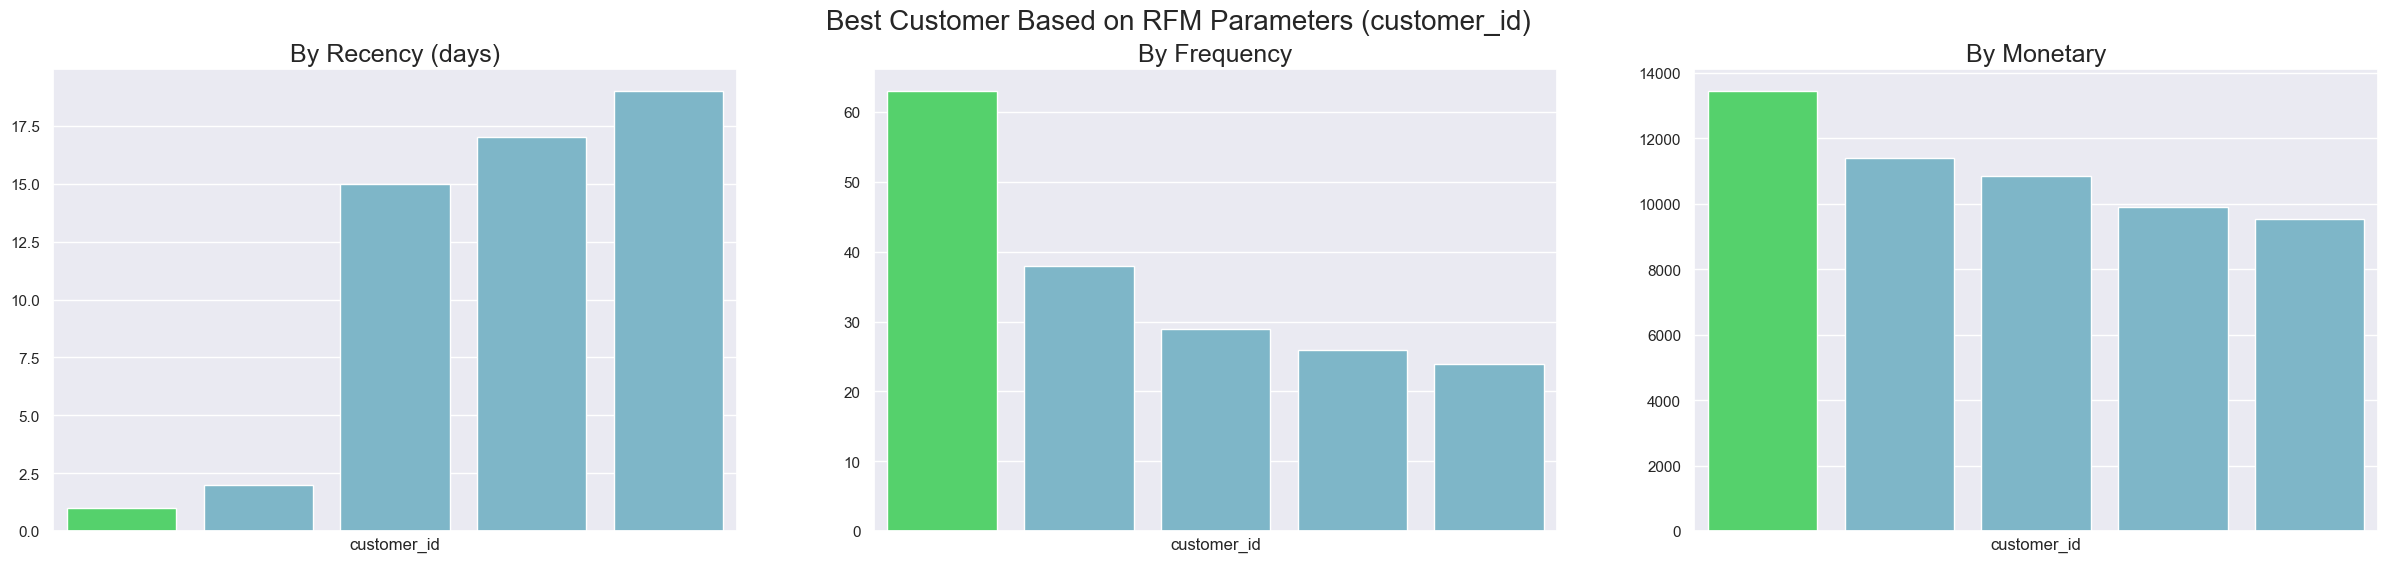

In [168]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#40E65F", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=df_rfm.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xticks([])

 
sns.barplot(y="frequency", x="customer_id", data=df_rfm.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticks([])

 
sns.barplot(y="monetary", x="customer_id", data=df_rfm.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[2].set_xticks([])

 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### **Bagaimana perilaku pembelian pelanggan dengan menggunakan RFM Analysis?**
Melalui visualisasi data diatas, dapat dilihat sebagai berikut: 
1. Untuk Recency, customer yang terakhir kali berbelanja adalah **1 hari yang lalu** diikuti oleh **2 hari yang lalu**, tetapi ada perbedaan cukup jauh setelahnya yaitu **15 hari yang lalu** dan seterusnya.
2. Untuk Frekuensi, customer dengan pembelian produk terbanyak adalah **63 produk**, lalu terjadi gap cukup jauh ke **30an produk** dan seterusnya. 
3. Untuk Monetary, customer dengan pengeluaran terbesar adalah **13440** diikuti oleh **11000an**, **10000an** dan seterusnya.

### Pertanyaan ke-5. Dimana saja customer terbanyak berdasarkan letak geografisnya?

In [169]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [170]:
geolocation_new = df_geolocation.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
geolocation_new[geolocation_new['count']>= 2].shape
max_state = df_geolocation.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [171]:
geolocation_map = df_geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_map = geolocation_map.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [172]:
customers_geolocation_map = df_customers.merge(geolocation_map,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [173]:
customers_geolocation_map.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,sao bernardo do campo,SP,-23.730435,-46.541474
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,sao paulo,SP,-23.531294,-46.656980
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,mogi das cruzes,SP,-23.499025,-46.183436
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,campinas,SP,-22.974331,-47.142173


In [174]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://www.mapsland.com/maps/south-america/brazil/map-of-brazil-with-cities-small.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -32.189, -34.4789, 9.6], aspect='auto')
    plt.show()

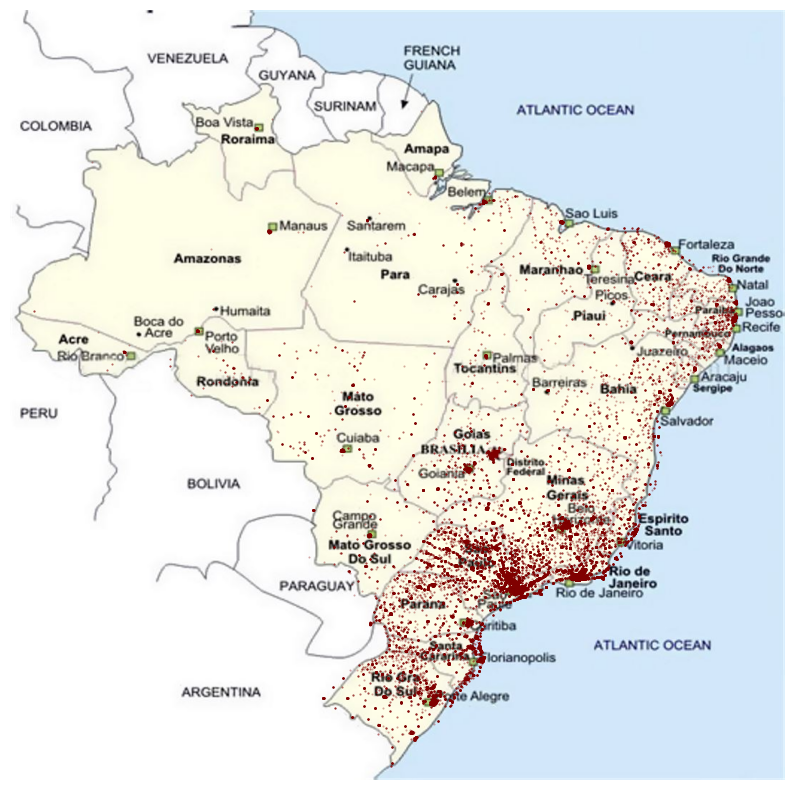

In [175]:
plot_brazil_map(customers_geolocation_map.drop_duplicates(subset='customer_unique_id'))

#### **Dimana saja customer terbanyak berdasarkan letak geografisnya?**
Melalui visualisasi data yang dapat dilihat, bahwa customer dengan pembelian terbanyak terletak pada daerah selatan negara Brazil seperti Provinsi **Sao Paulo, Rio de Janiero, Parana, Santa Cararina, Rio Gra Do Sul, dan lain sebagainya** dilihat dari **banyaknya titik-titik merah yang sangat rapat** di provinsi-provinsi tersebut. Uniknya, titik-titik yang rapat ini sebgaian besar terlihat pada **Ibu Kota dari provinsi tersebut**.

# **4. Kesimpulan**

* Produk apa saja yang memiliki jumlah pembelian terbesar dan terkecil?
* Bagaimana tingkat kepuasan pembeli terhadap layanan E-Commerce kami?
* Bagaimana performa order transaksi di platform E-Commerce setiap bulan?
* Bagaimana perilaku pembelian pelanggan dengan menggunakan RFM Analysis?
* Dimana saja customer terbanyak berdasarkan letak geografisnya?

#### **1. Produk apa saja yang memiliki jumlah pembelian terbesar dan terkecil?**
Produk dengan jumlah pembelian terbesar yaitu **bed_bath_table**. Sebaliknya produk dengan jumlah pembelian terkecil yaitu **security_and_services**.

#### **2. Bagaimana tingkat kepuasan pembeli terhadap layanan E-Commerce kami?**
**Rating 5 adalah rating tertinggi** dengan perolehan lebih dari 60000 customer, yang kemudian disusul oleh **rating 4** dan **rating 1**.

#### **3. Bagaimana performa order transaksi di platform E-Commerce setiap bulan?**
Performa order tertinggi adalah pada saat **November 2017**. Selain itu, ada peningkatan performa order mulai dari **Desember 2016** hingga **November 2017**. Kemudian mengalami stagnansi pada **Januari 2018** hingga **May 2018**.

#### **4. Bagaimana perilaku pembelian pelanggan dengan menggunakan RFM Analysis?**
1. Untuk Recency, customer yang terakhir kali berbelanja adalah **1 hari yang lalu** diikuti oleh **2 hari yang lalu**, tetapi ada perbedaan cukup jauh setelahnya yaitu **15 hari yang lalu** dan seterusnya.
2. Untuk Frekuensi, customer dengan pembelian produk terbanyak adalah **63 produk**, lalu terjadi gap cukup jauh ke **30an produk** dan seterusnya. 
3. Untuk Monetary, customer dengan pengeluaran terbesar adalah **13440** diikuti oleh **11000an**, **10000an**, dan seterusnya.

#### **5. Dimana saja customer terbanyak berdasarkan letak geografisnya?**
Customer dengan pembelian terbanyak terletak pada daerah selatan negara Brazil seperti Provinsi **Sao Paulo, Rio de Janiero, Parana, Santa Cararina, Rio Gra Do Sul, dan lain sebagainya** dilihat dari **banyaknya titik-titik merah yang sangat rapat** di provinsi-provinsi tersebut. Uniknya, titik-titik yang rapat ini sebgaian besar terlihat pada **Ibu Kota dari provinsi tersebut**.